# Import Libraries and Data set

In [ ]:
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # plotting library for Python
import pickle # convert Python objects into a byte stream that can be stored in a file
import seaborn as sns # data visualization
import nltk # NLP processing, provides tools and resources for tasks such as tokenization
from nltk.corpus import stopwords # list of common words that are often removed from text when performing text analysis or natural language processing
from wordcloud import WordCloud ,STOPWORDS # most frequently occurring words are displayed with larger font sizes
from nltk.stem import WordNetLemmatizer # converting words to their base or root
from sklearn.feature_extraction.text import TfidfVectorizer #converts a collection of raw text documents to a matrix of TF-IDF
from sklearn.model_selection import train_test_split #splitting a dataset into training and testing sets
from sklearn.metrics import accuracy_score, classification_report #evaluate the accuracy of a machine learning model
from sklearn.linear_model import LogisticRegression # probability of an event occurring based on the input features
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #finds a linear combination of features that maximizes the separation between classes
from sklearn.naive_bayes import GaussianNB #models the probability of a data point belonging to a class using Gaussian distributions
from sklearn.svm import SVC #finds the hyperplane that best separates the classes in the input data
from nltk.tokenize import word_tokenize




In [ ]:
data = pd.read_csv("/content/BBC News.csv")
# Read the CSV file into a DataFrame

In [ ]:
data.head()
#the dataset has 5 categories

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## #Understanding Features and target Variables

In [ ]:
data['Category'].unique()
# Identify the unique categories in the 'Category' column

array(['business', 'tech', 'politics', 'sport', 'entertainment', nan],
      dtype=object)

In [ ]:
data.shape
# Get the dimensions of the DataFrame (number of rows, number of columns)


(463, 3)

In [ ]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

# Checking for NULL values


In [ ]:
data.isnull().any()
# Check if there are any missing values in the DataFrame


ArticleId    False
Text         False
Category      True
dtype: bool

## Countplot of Target Variable(Category)

In [ ]:
# Calculate the length of each news article and create a new column 'News_length'
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0      1866
1      2016
2      3104
3      3618
4      2190
       ... 
458    1808
459    1515
460    3083
461     739
462    1888
Name: News_length, Length: 463, dtype: int64


# Distribution Plot

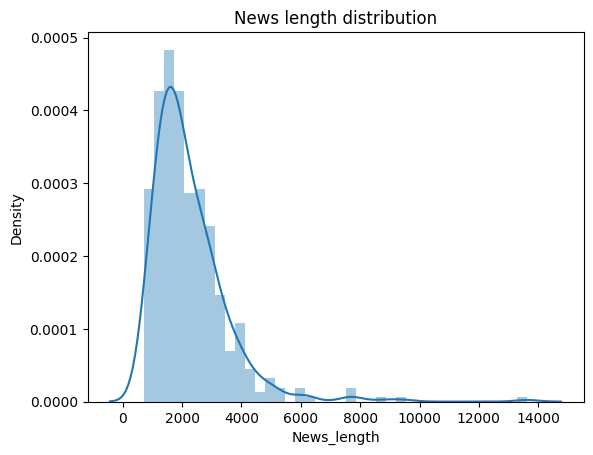

In [ ]:
sns.distplot(data['News_length']).set_title('News length distribution');
# Plot a distribution of the news article lengths using a histogram


# WordCloud

In [ ]:
# Function to create a word cloud visualization
def create_wordcloud(words):
    # Generate the word cloud with specified parameters
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)

    # Create a figure to display the word cloud
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")

    # Remove the axis labels and ticks
    plt.axis('off')

    # Show the word cloud
    plt.show()

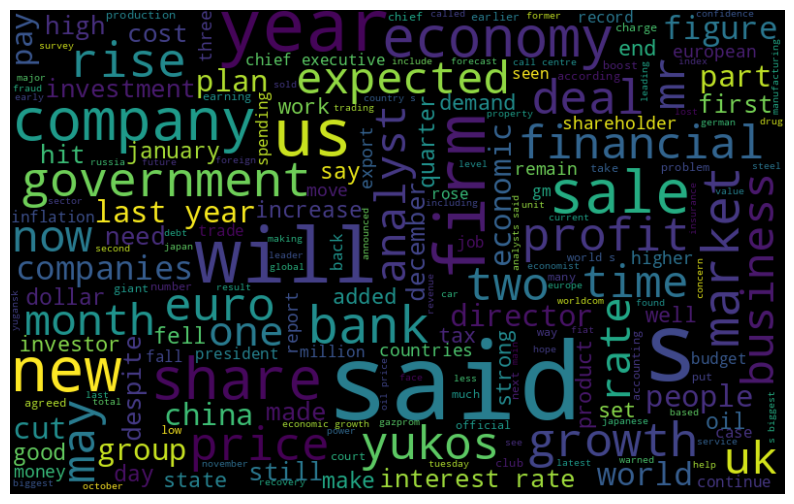

In [ ]:
# Create word clouds for each category

# Subset the data for the 'business' category
subset = data[data.Category == "business"]
text = subset.Text.values
words = " ".join(text)

# Create the word cloud for the 'business' category
create_wordcloud(words)

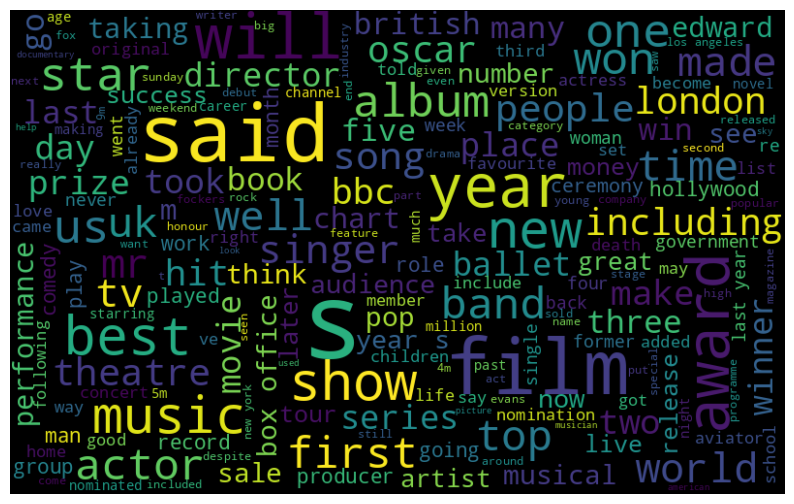

In [ ]:
# Subset the data for the 'entertainment' category
subset = data[data.Category == "entertainment"]
text = subset.Text.values
words = " ".join(text)

# Create the word cloud for the 'entertainment' category
create_wordcloud(words)


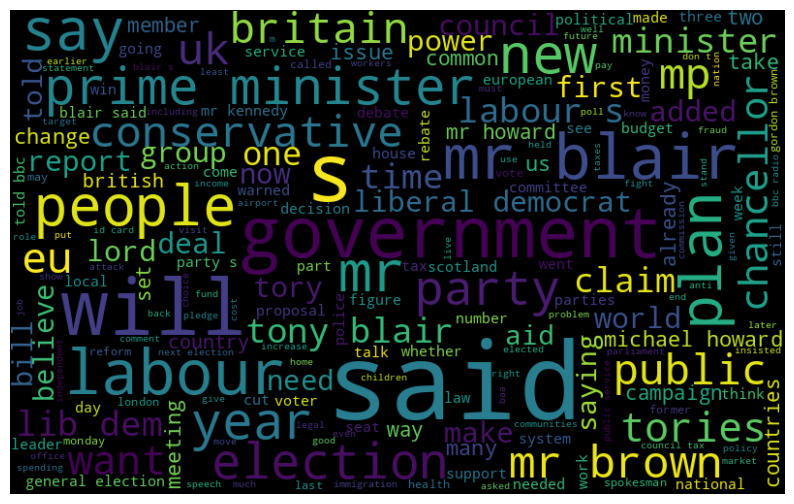

In [ ]:
# Subset the data for the 'politics' category
subset = data[data.Category == "politics"]
text = subset.Text.values
words = " ".join(text)

# Create the word cloud for the 'politics' category
create_wordcloud(words)

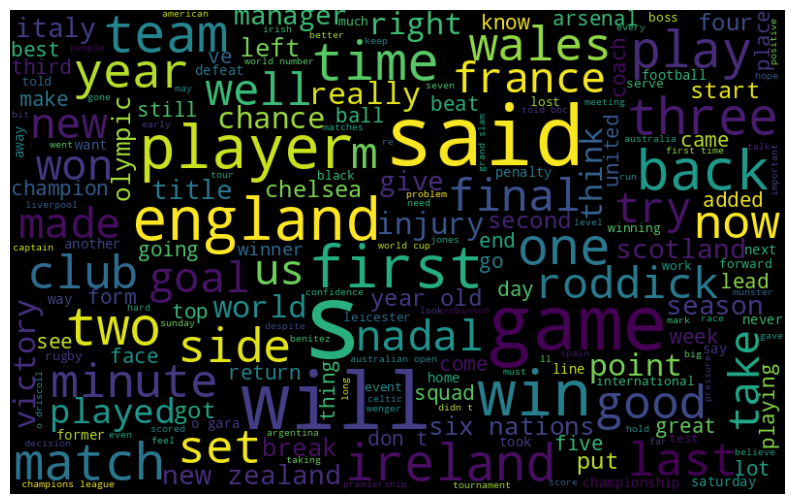

In [ ]:
# Subset the data for the 'sport' category
subset = data[data.Category == "sport"]
text = subset.Text.values
words = " ".join(text)

# Create the word cloud for the 'sport' category
create_wordcloud(words)

# Feature Engineering

In [ ]:
# Function to process the text
def process_text(text):
    # Convert the text to lowercase and remove newlines, crarriage retuns, and leading/trailing whitespaces
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()

    # Replace multiple spaces with a single space using regex
    text = re.sub(' +', ' ', text)

    # Remove special characters and punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text into words
    word_tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    # Reconstruct the filtered sentence into a string
    text = " ".join(filtered_sentence)

    return text

In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('punkt')

# Function to process text
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text

# Apply text processing to the 'Text' column and create a new column 'Text_parsed'
data['Text_parsed'] = data['Text'].apply(process_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [ ]:
from sklearn import preprocessing

# Create a LabelEncoder object
label_encoder = preprocessing.LabelEncoder()

# Apply label encoding to the 'Category' column and create a new column 'Category_target'
data['Category_target'] = label_encoder.fit_transform(data['Category'])


In [ ]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [ ]:
data.to_csv('BBC_News_processed.csv')

# Split the data in Training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'],
                                                    data['Category_target'],
                                                    test_size=0.2,
                                                    random_state=8)

In [ ]:
ngram_range = (1, 2)
min_df = 10
max_df = 1.0
max_features = 300

# ngram_range specifies the range of n-grams to consider during tokenization.
# Here, it is set to (1, 2), meaning both unigrams (single words) and bigrams (pairs of consecutive words) will be considered.

# min_df sets the minimum frequency threshold for a term to be included in the feature matrix.
# Terms that occur less frequently than min_df will be ignored.

# max_df sets the maximum document frequency threshold for a term to be included in the feature matrix.
# Terms that occur in a higher proportion of documents than max_df will be ignored.
# In this case, it is set to 1.0, indicating that terms with any document frequency will be included.

# max_features sets the maximum number of features (terms) to be included in the feature matrix.
# Only the top max_features terms ordered by term frequency across the corpus will be considered.


In [ ]:
# Using TfidfVectorizer for feature extraction
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

# Fit and transform the training data to obtain the feature matrix
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

# Transform the test data using the same vectorizer to obtain the feature matrix
features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


[[0.         0.         0.         ... 0.24019797 0.29845738 0.        ]
 [0.         0.         0.12337804 ... 0.08092118 0.         0.        ]
 [0.         0.         0.         ... 0.06060734 0.07530749 0.        ]
 ...
 [0.12039736 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.13698179 0.         0.        ]
 [0.         0.         0.06405198 ... 0.04201041 0.         0.        ]]
(93, 300)


# Building Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier model with a random_state of 1
model = RandomForestClassifier(random_state=1)

# Fit the model on the training features and labels
model.fit(features_train, labels_train)

# Use the trained model to make predictions on the test features
model_predictions = model.predict(features_test)

# Calculate and print the accuracy of the model
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Generate and print a classification report for the model's predictions
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8602150537634409
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       1.00      0.59      0.74        17
           2       0.80      0.89      0.84         9
           3       0.84      0.96      0.90        27
           4       0.94      0.89      0.91        18
           5       0.00      0.00      0.00         1

    accuracy                           0.86        93
   macro avg       0.73      0.71      0.71        93
weighted avg       0.87      0.86      0.85        93



In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create LogisticRegression model
model = LogisticRegression()

# Print the model parameters
print(model.get_params())

# Fit the model on the training data
model.fit(features_train, labels_train)

# Make predictions on the test data
model_predictions = model.predict(features_test)

# Evaluate the accuracy
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Print the classification report
print(classification_report(labels_test, model_predictions))


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9139784946236559
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.82      0.90        17
           2       0.88      0.78      0.82         9
           3       0.90      0.96      0.93        27
           4       1.00      0.94      0.97        18
           5       0.00      0.00      0.00         1

    accuracy                           0.91        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.91      0.91      0.91        93



#Hyper Parameter Tuning (Logistic Regression)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 0.001, 1],  # Values to search for the inverse of regularization strength
    'penalty': ['l1', 'l2']  # Regularization penalty options
}

# Create a GridSearchCV object with the logistic regression model and the parameter grid
clf = GridSearchCV(model, param_grid, cv=3, verbose=1)

# Fit the grid search on the training data to find the best hyperparameters
bestF = clf.fit(features_train, labels_train)

# Print the best hyperparameters found
bestF.best_params_


Fitting 3 folds for each of 6 candidates, totalling 18 fits


{'C': 1, 'penalty': 'l2'}

In [ ]:

# Create a Logistic Regression model with C=1
model = LogisticRegression(C=1)

# Fit the model on the training data
model.fit(features_train, labels_train)

# Make predictions on the test data
model_predictions = model.predict(features_test)

# Calculate and print the accuracy of the model
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Generate and print the classification report of the model
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9139784946236559
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.82      0.90        17
           2       0.88      0.78      0.82         9
           3       0.90      0.96      0.93        27
           4       1.00      0.94      0.97        18
           5       0.00      0.00      0.00         1

    accuracy                           0.91        93
   macro avg       0.77      0.75      0.76        93
weighted avg       0.91      0.91      0.91        93



In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# Create a K-Nearest Neighbors (KNN) classifier model
model = KNeighborsClassifier()

# Fit the model on the training data
model.fit(features_train, labels_train)

# Make predictions on the test data
model_predictions = model.predict(features_test)

# Calculate and print the accuracy of the model
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Generate and print the classification report of the model
print(classification_report(labels_test, model_predictions))


Accuracy:  0.9139784946236559
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        21
           1       0.93      0.82      0.87        17
           2       1.00      0.89      0.94         9
           3       0.93      0.96      0.95        27
           4       0.94      0.94      0.94        18
           5       0.00      0.00      0.00         1

    accuracy                           0.91        93
   macro avg       0.77      0.76      0.77        93
weighted avg       0.91      0.91      0.91        93



In [ ]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree classifier
model = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
model.fit(features_train, labels_train)

# Make predictions on the test data
model_predictions = model.predict(features_test)

# Calculate and print the accuracy score
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Print the classification report
print(classification_report(labels_test, model_predictions))

Accuracy:  0.6129032258064516
              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.40      0.35      0.38        17
           2       0.50      0.56      0.53         9
           3       0.63      0.81      0.71        27
           4       0.86      0.67      0.75        18
           5       0.00      0.00      0.00         1

    accuracy                           0.61        93
   macro avg       0.50      0.49      0.49        93
weighted avg       0.61      0.61      0.61        93



In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

# GaussianNB

In [ ]:
# Instantiate a Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the classifier to the training data
model.fit(features_train, labels_train)

# Use the trained model to make predictions on the test data
model_predictions = model.predict(features_test)

# Compute and print the accuracy score
print('Accuracy: ', accuracy_score(labels_test, model_predictions))

# Generate and print the classification report
print(classification_report(labels_test, model_predictions))


Accuracy:  0.8494623655913979
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.78      0.82      0.80        17
           2       0.86      0.67      0.75         9
           3       0.96      0.96      0.96        27
           4       0.79      0.83      0.81        18
           5       0.00      0.00      0.00         1

    accuracy                           0.85        93
   macro avg       0.70      0.69      0.69        93
weighted avg       0.84      0.85      0.84        93



## Doc2Vec

In [ ]:
bbc = pd.DataFrame()
bbc['Text'] = data['Text_parsed']
bbc['Category'] = data['Category_target']
bbc.head()

,Text,Category
0,worldcom exboss launches defence lawyers defen...,0
1,german business confidence slides german busin...,0
2,bbc poll indicates economic gloom citizens maj...,0
3,lifestyle governs mobile choice faster better ...,4
4,enron bosses 168m payout eighteen former enron...,0


In [ ]:
from tqdm import tqdm  # Importing the tqdm library for progress bar visualization
tqdm.pandas(desc="progress-bar")  # Setting up the progress bar description

from gensim.models import Doc2Vec  # Importing the Doc2Vec model from gensim
from sklearn import utils  # Importing utilities from scikit-learn
import gensim  # Importing gensim library for Doc2Vec implementation
from gensim.models.doc2vec import TaggedDocument  # Importing TaggedDocument from gensim

import re  # Importing the regular expression library for text preprocessing

def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []

    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)  # Create a unique label for each document
        labeled.append(TaggedDocument(v.split(), [label]))  # Tag the document with the label

    return labeled

# Split the preprocessed text data and category labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bbc.Text, bbc.Category, random_state=0, test_size=0.3)

# Label the sentences in the training and testing sets
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')

# Combine the labeled training and testing sets into a single list
all_data = X_train + X_test


In [ ]:
all_data[0:2]

[TaggedDocument(words=['singer', 'film', 'show', 'festival', 'documentary', 'takes', 'candid', 'look', 'life', 'charttopping', 'singer', 'george', 'michael', 'shown', 'year', 'berlin', 'film', 'festival', 'different', 'story', 'screen', 'panorama', 'section', 'festival', 'runs', '1020', 'february', 'features', 'singer', 'talking', 'career', 'personal', 'life', 'days', 'wham', 'recent', 'events', 'michael', 'attend', 'festival', 'introduce', 'screening', '16', 'february', 'director', 'southan', 'morris', 'executive', 'producer', 'andy', 'stephens', 'also', 'attend', 'festival', '93', 'minute', 'film', 'see', 'michael', 'discussing', 'early', 'days', 'wham', 'along', 'later', 'career', 'including', 'legal', 'battles', 'record', 'label', 'sony', 'stance', 'iraq', 'war', 'american', 'politics', 'also', 'touch', 'upon', 'turbulent', 'personal', 'life', 'including', 'arrest', 'beverly', 'hills', 'park', 'toilet', '1998', 'lewd', 'behaviour', 'death', 'boyfriend', 'anselmo', 'feleppa', 'aids'

In [ ]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
# Initialize the Doc2Vec model with specified parameters
# - dm: Use the distributed bag of words (DBOW) algorithm (dm=0)
# - vector_size: Set the dimensionality of the feature vectors to 300
# - negative: Number of negative samples to be drawn during training
# - min_count: Ignore words with a frequency lower than 1
# - alpha: Learning rate for model training
# - min_alpha: Minimum learning rate

model_dbow.build_vocab([x for x in tqdm(all_data)])
# Build the vocabulary for the model using the labeled data
# - Iterate through all_data and add the words to the model's vocabulary

for epoch in range(30):
    # Iterate over 30 epochs for training the model
    model_dbow.train(utils.shuffle([x for x in tqdm(all_data)]), total_examples=len(all_data), epochs=1)
    # Train the model for one epoch with shuffled data
    # - Shuffle the data to avoid any bias in the order of sentences
    # - total_examples: Total number of sentences (training examples) in all_data
    # - epochs: Number of iterations over the data for training

    model_dbow.alpha -= 0.002
    # Decrease the learning rate (alpha) by 0.002 after each epoch
    model_dbow.min_alpha = model_dbow.alpha
    # Set the minimum learning rate (min_alpha) to the updated alpha value


100%|██████████| 463/463 [00:00<00:00, 1671224.40it/s]


In [ ]:
import numpy as np

def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    # Initialize an array to store the vectors

    for i in range(0, corpus_size):
        # Iterate over the corpus size
        prefix = vectors_type + '_' + str(i)
        # Create the prefix for the vector based on the vectors_type and index
        vectors[i] = model.docvecs[prefix]
        # Retrieve the vector representation of the document using the prefix and store it in the vectors array

    return vectors

train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
# Get the document vectors for the training data using the trained Doc2Vec model
# - len(X_train): Size of the training data
# - 300: Size of the embedding vectors
# - 'Train': Prefix for the training vectors

test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')
# Get the document vectors for the testing data using the trained Doc2Vec model
# - len(X_test): Size of the testing data
# - 300: Size of the embedding vectors
# - 'Test': Prefix for the testing vectors


# Logistic Regression

In [ ]:
model = LogisticRegression(n_jobs=1, C=1e5)
# Create a Logistic Regression model with specified parameters
# - n_jobs: Number of CPU cores to use for parallel processing (-1 uses all available cores)
# - C: Inverse of regularization strength (smaller values specify stronger regularization)

model = model.fit(train_vectors_dbow, y_train)
# Fit the Logistic Regression model to the training data and labels
# - train_vectors_dbow: Document vectors of the training data
# - y_train: Labels of the training data

model_prediction = model.predict(test_vectors_dbow)
# Use the trained model to predict labels for the testing data

print('accuracy %s' % accuracy_score(model_prediction, y_test))
# Calculate and print the accuracy of the model's predictions on the testing data
# - model_prediction: Predicted labels for the testing data
# - y_test: True labels of the testing data

print(classification_report(y_test, model_prediction))
# Generate and print a classification report showing precision, recall, F1-score, and support for each class
# - y_test: True labels of the testing data
# - model_prediction: Predicted labels for the testing data


accuracy 0.9784172661870504
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      1.00      1.00        26
           2       0.94      1.00      0.97        16
           3       0.97      0.97      0.97        36
           4       1.00      0.95      0.98        21
           5       0.00      0.00      0.00         1

    accuracy                           0.98       139
   macro avg       0.81      0.82      0.82       139
weighted avg       0.97      0.98      0.97       139



In [ ]:
model = GaussianNB()
# Create a Gaussian Naive Bayes model

model = model.fit(train_vectors_dbow, y_train)
# Fit the Gaussian Naive Bayes model to the training data and labels
# - train_vectors_dbow: Document vectors of the training data
# - y_train: Labels of the training data

model_prediction = model.predict(test_vectors_dbow)
# Use the trained model to predict labels for the testing data

print('accuracy %s' % accuracy_score(model_prediction, y_test))
# Calculate and print the accuracy of the model's predictions on the testing data
# - model_prediction: Predicted labels for the testing data
# - y_test: True labels of the testing data

print(classification_report(y_test, model_prediction))
# Generate and print a classification report showing precision, recall, F1-score, and support for each class
# - y_test: True labels of the testing data
# - model_prediction: Predicted labels for the testing data


accuracy 0.9496402877697842
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.96      0.92      0.94        26
           2       1.00      0.94      0.97        16
           3       0.95      1.00      0.97        36
           4       0.90      0.90      0.90        21
           5       0.00      0.00      0.00         1

    accuracy                           0.95       139
   macro avg       0.79      0.79      0.79       139
weighted avg       0.94      0.95      0.95       139



# Letting user add articles to classify


In [ ]:
import pickle

# Assuming you have trained the `tfidf` and `label_encoder` objects
with open('tfidf.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize

import re
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from google.colab import files
import ipywidgets as widgets
from IPython.display import display

# Function to process text
def process_text(text):
    text = text.lower().replace('\n', ' ').replace('\r', '').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)

    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)

    text = " ".join(filtered_sentence)
    return text

# Load the preprocessed dataset
data = pd.read_csv('BBC News.csv')

# Load the TF-IDF vectorizer and label encoder
with open('/content/tfidf.pkl', 'rb') as file:
    tfidf = pickle.load(file)

with open('/content/label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

# Create a dropdown widget for file selection
file_dropdown = widgets.FileUpload(
    description='Select CSV file:',
    accept='.csv'
)

# Create a button widget to trigger the prediction
predict_button = widgets.Button(
    description='Predict',
    button_style='success',
    layout=widgets.Layout(margin='30px 0 0 0')
)

def predict_button_clicked(button):
    # Check if a file is selected
    if file_dropdown.value:
        # Read the selected CSV file
        file_path = next(iter(file_dropdown.value))
        uploaded_data = pd.read_csv(file_path)

        # Preprocess the text in the uploaded data
        uploaded_data['Text_parsed'] = uploaded_data['Text'].apply(process_text)

        # Get the total number of rows in the uploaded data
        total_rows = len(uploaded_data)

        # Create a progress bar widget
        progress_bar = widgets.FloatProgress(
            value=0.0,
            min=0.0,
            max=1.0,
            description='Progress:',
            bar_style='info',
            style={'bar_color': 'blue'},
            layout=widgets.Layout(width='50%')
        )

        # Display the progress bar
        display(progress_bar)

        # Perform prediction using the trained model
        predicted_categories = []
        for i, row in uploaded_data.iterrows():
            features_upload = tfidf.transform([row['Text_parsed']]).toarray()
            predicted_label = model.predict(features_upload)[0]
            predicted_category = label_encoder.inverse_transform([predicted_label])[0]
            predicted_categories.append(predicted_category)

            # Update the progress bar
            progress_bar.value = (i + 1) / total_rows

        # Add the predicted categories to the uploaded data
        uploaded_data['Predicted_Category'] = predicted_categories

        # Display the predicted categories
        display(uploaded_data[['Text', 'Predicted_Category']]
)
    else:
        print("Please select a CSV file.")

# Register the event handler for the button click
predict_button.on_click(predict_button_clicked)

# Display the widgets
display(file_dropdown, predict_button)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileUpload(value={}, accept='.csv', description='Select CSV file:')

Button(button_style='success', description='Predict', layout=Layout(margin='30px 0 0 0'), style=ButtonStyle())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(width='50%'), max=1.0, style…

,Text,Predicted_Category
0,2019 will see gadgets like gaming smartphones ...,tech
1,It has also unleashed a wave of changes in the...,tech
2,It can be confusing to pick the right smartpho...,tech
3,The mobile application is integrated with a da...,tech
4,We have rounded up some of the gadgets that sh...,tech
...,...,...
2743,"According to researchers, fraud in the mobile ...",sport
2744,The iPhone XS and XS Max share the Apple A12 c...,tech
2745,"On the photography front, the Note 5 Pro featu...",tech
2746,UDAY mandated that discoms bring the gap betwe...,tech
